# Exploring Attendance and Turnover

By Kani

In [32]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


In [33]:
# import data
hr_data = pd.read_csv("../data/HRDataset_v14 2.csv")

In [34]:
# Print first 5 columns
hr_data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [35]:
# Describe your numeric columns
hr_data.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


In [36]:
# display null values in your dataframe
hr_data.isnull()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
307,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
308,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
309,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


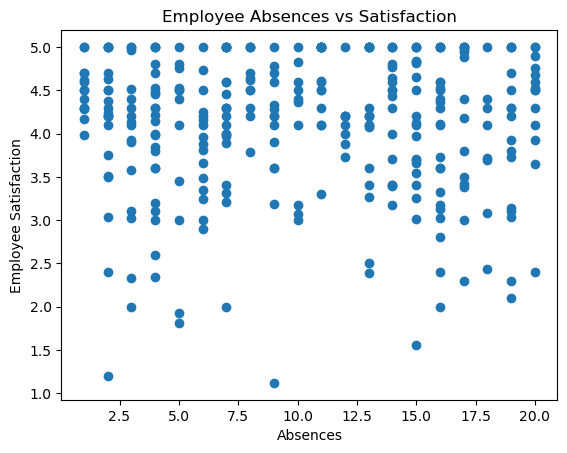

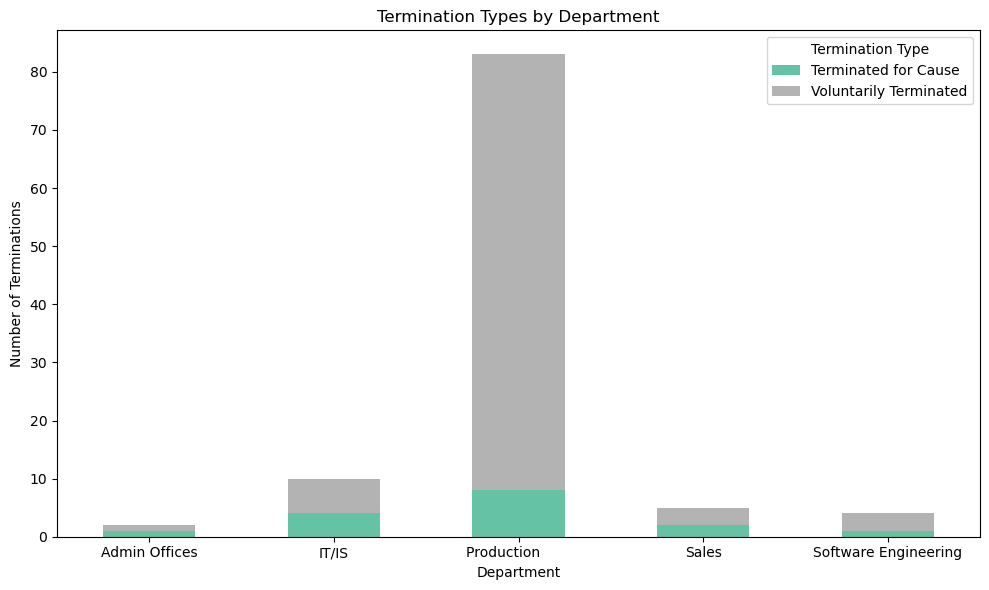

Total Production employees: 209
Terminated Production employees: 83 (39.7%)
Termination reasons breakdown:
TermReason
Another position                    17
unhappy                             14
more money                          11
hours                                6
career change                        6
return to school                     5
attendance                           5
retiring                             4
relocation out of area               4
military                             4
performance                          2
maternity leave - did not return     2
no-call, no-show                     1
medical issues                       1
gross misconduct                     1
Name: count, dtype: int64


In [37]:
# Beginning of EDA

# Plotting Employee absences vs Engagement/Satisfaction - 

plt.scatter(hr_data['Absences'], hr_data['EngagementSurvey'])
plt.title('Employee Absences vs Satisfaction')
plt.xlabel('Absences')
plt.ylabel('Employee Satisfaction')
plt.show()



# Plotting Departments vs Termination rates
terminated_df = hr_data[hr_data['EmploymentStatus'] != 'Active']
term_type = terminated_df.groupby(['Department', 'EmploymentStatus']).size().unstack(fill_value=0)

term_type.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title('Termination Types by Department')
plt.xlabel('Department')
plt.ylabel('Number of Terminations')
plt.legend(title='Termination Type')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# Plotting Termination Reason 


""" # production_terminated = terminated_df[terminated_df['Department'] == 'Production       ']
prod_term_reason_counts = production_terminated['TermReason'].value_counts()

prod_term_reason_counts.plot(kind='bar')
plt.title('Termination Reasons in Production Department')
plt.xlabel('Reason for Leaving')
plt.ylabel('Number of Employees')
#plt.show """

total_prod = hr_data[hr_data['Department'] == 'Production       '].shape[0]
production_terminated = terminated_df[terminated_df['Department'] == 'Production       ']
terminated_count = production_terminated.shape[0]
prod_term_reason_counts = production_terminated['TermReason'].value_counts()
termination_rate = (terminated_count / total_prod) * 100 if total_prod > 0 else 0

print(f"Total Production employees: {total_prod}")
print(f"Terminated Production employees: {terminated_count} ({termination_rate:.1f}%)")
print("Termination reasons breakdown:")
print(prod_term_reason_counts)


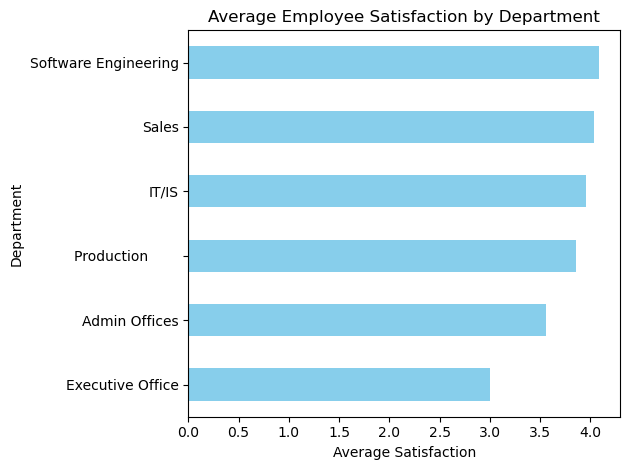

In [38]:

# Average Employee Satisfaction by Department

dept_satisfaction = hr_data.groupby('Department')['EmpSatisfaction'].mean().sort_values()

dept_satisfaction.plot(kind='barh', color='skyblue')
plt.title('Average Employee Satisfaction by Department')
plt.xlabel('Average Satisfaction')
plt.ylabel('Department')
plt.tight_layout()
plt.show()



In [39]:
# Calculate average absences by termination reason
avg_abs = terminated_df.groupby('TermReason')['Absences'].mean()
top_10_avg_abs = avg_abs.sort_values(ascending=False).head(10)
print(top_10_avg_abs.round(2))


TermReason
gross misconduct                    18.00
attendance                          14.00
military                            13.25
more money                          12.55
relocation out of area              12.40
maternity leave - did not return    12.33
performance                         11.50
no-call, no-show                    11.00
unhappy                             10.64
Another position                    10.45
Name: Absences, dtype: float64


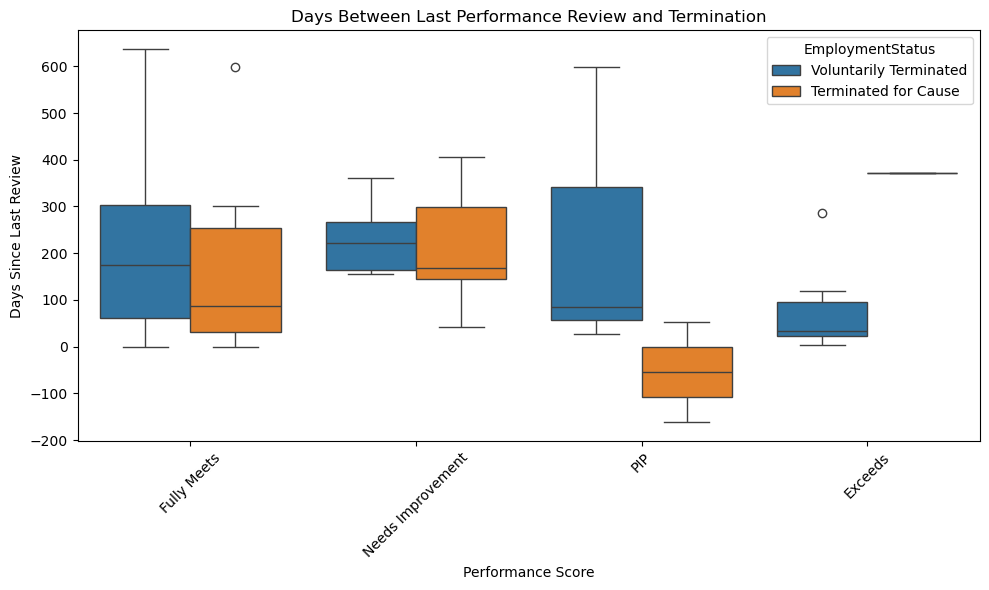

PerformanceScore   EmploymentStatus      
Exceeds            Terminated for Cause      372.000000
                   Voluntarily Terminated     80.285714
Fully Meets        Terminated for Cause      170.000000
                   Voluntarily Terminated    196.684932
Needs Improvement  Terminated for Cause      212.000000
                   Voluntarily Terminated    233.800000
PIP                Terminated for Cause      -54.500000
                   Voluntarily Terminated    236.666667
Name: DaysSinceReview, dtype: float64

In [40]:
# Ensure dates are datetime objects
hr_data['DateofTermination'] = pd.to_datetime(hr_data['DateofTermination'], errors='coerce')
hr_data['LastPerformanceReview_Date'] = pd.to_datetime(hr_data['LastPerformanceReview_Date'], errors='coerce')

# Calculate days between review and termination
hr_data['DaysSinceReview'] = (hr_data['DateofTermination'] - hr_data['LastPerformanceReview_Date']).dt.days

# Filter only terminated employees
terminated = hr_data[hr_data['EmploymentStatus'] != 'Active']

# Plot a boxplot to see the distribution by performance score
plt.figure(figsize=(10, 6))
sns.boxplot(data=terminated, x='PerformanceScore', y='DaysSinceReview', hue='EmploymentStatus')
plt.title('Days Between Last Performance Review and Termination')
plt.xlabel('Performance Score')
plt.ylabel('Days Since Last Review')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

terminated = hr_data[hr_data['EmploymentStatus'] != 'Active'].copy()
terminated['LastPerformanceReview_Date'] = pd.to_datetime(terminated['LastPerformanceReview_Date'])
terminated['DateofTermination'] = pd.to_datetime(terminated['DateofTermination'])

terminated['DaysSinceReview'] = (terminated['DateofTermination'] - terminated['LastPerformanceReview_Date']).dt.days

# Compare average days since last review by performance rating and term reason
terminated.groupby(['PerformanceScore', 'EmploymentStatus'])['DaysSinceReview'].mean()


Is there a relationship between how often employees are absent and how satisfied or engaged they feel at work?

To find out if there’s a connection between how often employees are absent and how they feel at work, I looked at the correlation between absences and both engagement and satisfaction. The results showed a correlation of -0.0088 between absences and engagement, and 0.0752 between absences and satisfaction. Since both values are very close to zero, it suggests that there isn’t a meaningful relationship. In other words, employees who are more absent don’t necessarily feel less satisfied or engaged at work, and vice versa. Absenteeism might be influenced by other factors that aren’t directly related to how people feel about their jobs.

Which departments have the highest termination rates, and what types of terminations are most common in each?

The Production department has the highest termination rate by a significant margin, with 83 out of 209 employees leaving, resulting in a 39.7% turnover rate. This is considerably higher than other departments, such as IT/IS, which had 10 terminations out of 50 employees (20.0%), Sales with 5 out of 31 employees (16.1%), and Software Engineering with 4 out of 11 employees (36.4%). Within Production, the most common reasons for termination were accepting another position (17 employees), career changes (6 employees), medical issues (1 employee), and dissatisfaction with work hours (6 employees). Additionally, 14 employees cited being unhappy as their reason for leaving. Other departments showed fewer terminations overall, mainly related to career progression, such as IT/IS with 1 termination for career change, and Sales with 1 termination due to relocation. Overall, voluntary terminations dominate across all departments, especially in Production, indicating that retention challenges are largely driven by employee choice rather than disciplinary or involuntary actions.


Is there a relationship between employees' performance scores and the number of days between their last performance review and termination, and does this differ by employment status?

The boxplot shows a clear link between performance scores and the time between an employee’s last review and termination, with differences by employment status. Employees rated “PIP” and terminated for cause were often let go within 0 to 50 days. For some, even before a review, indicating quick action on low performers. In contrast, voluntarily terminated “PIP” employees showed a much wider range, some staying over 600 days post-review. For “Fully Meets” and “Needs Improvement,” the timelines were more spread out, but those terminated for cause still had shorter durations on average. High performers (“Exceeds”) were almost exclusively voluntarily terminated, usually within 100 days of their last review. Overall, the data suggests underperformers are reviewed and dismissed quickly when necessary, while strong performers tend to leave voluntarily soon after being evaluated.

Given the trends in the data, what strategies would you suggest to improve employee retention and performance?

Based on the trends in the data, one strategy I would suggest is focusing on the Production department, which shows a significantly higher number of terminations compared to other departments. This could point to issues like poor management, job dissatisfaction, or a lack of growth opportunities.Also, since the correlation between absences and engagement/satisfaction was very low, it might be more effective to focus on improving overall employee experience through better communication, recognition programs, and more opportunities for feedback. Investing in professional development and offering clearer paths for advancement could also boost both retention and performance over time.